## Processamento de Imagens

In [28]:
# import %pip install numpy
import numpy as np
import cv2
from PIL import Image

### Leitura e Exibição de Imagens

In [16]:
# Usando OpenCV
image_cv = cv2.imread('text.jpg')
cv2.imshow('Imagem usando OpenCV', image_cv)
cv2.waitKey(0)  # Espera até que uma tecla seja pressionada
cv2.destroyAllWindows()


In [6]:
# Usando Pillow
image_pil = Image.open('text.jpg')
image_pil.show()  # Exibe a imagem

### Redimensionar Imagem

In [7]:
# Redimensionar usando OpenCV
resized_image_cv = cv2.resize(image_cv, (200, 200))
cv2.imshow('Imagem Redimensionada (OpenCV)', resized_image_cv)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
# Redimensionar usando Pillow
resized_image_pil = image_pil.resize((200, 200))
resized_image_pil.show()

### Conversão de Cor (RGB para Grayscale)

In [17]:
# Conversão usando OpenCV
image_corinthians_cv = cv2.imread('corinthians.png')
gray_image_corinthians_cv = cv2.cvtColor(image_corinthians_cv, cv2.COLOR_BGR2GRAY)
cv2.imshow('Imagem em Tons de Cinza (OpenCV)', gray_image_corinthians_cv)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [19]:
gray_image_cv= cv2.cvtColor(image_cv, cv2.COLOR_BGR2GRAY)
cv2.imshow('Imagem em Tons de Cinza (OpenCV)', gray_image_cv)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [13]:
# Conversão usando Pillow
image_pil = Image.open('corinthians.png')
gray_image_pil = image_pil.convert('L')
gray_image_pil.show()


### Aplicar um Filtro (Blur)

In [14]:
# Aplicar Blur usando OpenCV
blurred_image = cv2.GaussianBlur(image_cv, (5, 5), 0)
cv2.imshow('Imagem com Blur (OpenCV)', blurred_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Detectar Bordas (Canny)

In [20]:
# Detectar bordas usando OpenCV
edges = cv2.Canny(gray_image_cv, 100, 200)
cv2.imshow('Detecção de Bordas (Canny)', edges)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Processamento de Texto

### Instalação

In [21]:
import pytesseract

tesseract_path = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
pytesseract.pytesseract.tesseract_cmd = tesseract_path


In [31]:
image = cv2.imread('blur_text.png')
cv2.imshow('Imagem Original', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [41]:

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Ensure the Tesseract executable has the necessary permissions
# if not os.access(tesseract_path, os.X_OK):
#     os.chmod(tesseract_path, 0o755)

texto_extraido = pytesseract.image_to_string(gray_image, lang='por')  # Use 'eng' para inglês, 'por' para português

print("Texto Extraído:")
print(texto_extraido)

Texto Extraído:



In [45]:
# Aplicar um threshold binário
_, binary_image = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

cv2.imshow('Imagem Binária', binary_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [46]:
# Melhorar o contraste usando equalização de histograma
equalized_image = cv2.equalizeHist(binary_image)
cv2.imshow('Imagem com Histograma Equalizado', equalized_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [54]:
texto_extraido = pytesseract.image_to_string(image, lang='por')
print("Texto Extraído após Pré-processamento:")
print(texto_extraido)

Texto Extraído após Pré-processamento:
Blur Text



In [95]:
image = cv2.imread('recibo.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
binary_image = cv2.threshold(gray_image, 116, 255, cv2.THRESH_BINARY)[1]
equalized_image = cv2.equalizeHist(binary_image)

# cv2.imshow('Imagem Original', cv2.resize(image, (800, 600)))
cv2.imshow('Imagem Binária', cv2.resize(binary_image, (800, 600)))

# threshholds = [100, 105, 110, 115, 120, 125, 130, 135, 140, 145]
# for threshhold in threshholds:
#     _, binary_image = cv2.threshold(gray_image, threshhold, 255, cv2.THRESH_BINARY)
#     cv2.imshow(f'Imagem Binária (Threshhold = {threshhold})', cv2.resize(binary_image, (800, 600)))

# Extrair dados detalhados
dados = pytesseract.image_to_data(equalized_image, lang='por', output_type=pytesseract.Output.DICT)
texto_extraido = pytesseract.image_to_string(equalized_image, lang='deu')
print("Texto Extraído:")
print(texto_extraido)

marked_image = image.copy()

# Exibir cada palavra e suas coordenadas na imagem
for i in range(len(dados['text'])):
    # if int(dados['conf'][i]) > 20:  # Filtrar por confiança mínima
    x, y, w, h = dados['left'][i], dados['top'][i], dados['width'][i], dados['height'][i]
    texto = dados['text'][i]
    print(f'Texto: {texto}, Coordenadas: ({x}, {y}), Largura: {w}, Altura: {h}')
    # Desenhar retângulos ao redor do texto na imagem
    cv2.rectangle(marked_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Mostrar a marked_imagem com os retângulos ao redor dos textos detectados
cv2.imshow('Texto Detectado', cv2.resize(marked_image, (800, 600)))
cv2.waitKey(0)
cv2.destroyAllWindows()

Texto Extraído:
Aldi Süd
Ludwigsplatz 6
54283 Darmstadt

u]

we

Ex (1,19
1370628 Weizenbrötchen 0,38
134038 Kochbeutel Reis 0,99
2131554 Schw. Bratwurst 2,79
531838 Kaffeedri Cappuec | 0,75
33189? Kaffeedr. Espres 0,75
Pa 2,29

5652178 Multifunkt.-Papier ,,98
Artikelstorno

- 562178 Multifunkt..-Papie -2,99

> u m m

—e i3 „Ka

Texto: , Coordenadas: (0, 0), Largura: 2308, Altura: 1592
Texto: , Coordenadas: (749, 11), Largura: 767, Altura: 255
Texto: , Coordenadas: (769, 11), Largura: 747, Altura: 255
Texto: , Coordenadas: (950, 11), Largura: 411, Altura: 73
Texto: Aldi, Coordenadas: (950, 18), Largura: 189, Altura: 66
Texto: Sud, Coordenadas: (1208, 11), Largura: 153, Altura: 65
Texto: , Coordenadas: (801, 100), Largura: 715, Altura: 80
Texto: Ludwigsplatz, Coordenadas: (801, 102), Largura: 604, Altura: 78
Texto: 6, Coordenadas: (1472, 100), Largura: 44, Altura: 61
Texto: , Coordenadas: (749, 189), Largura: 762, Altura: 77
Texto: b4283, Coordenadas: (749, 201), Largura: 247, Altura: 6

## Testando Gráficos Interativos


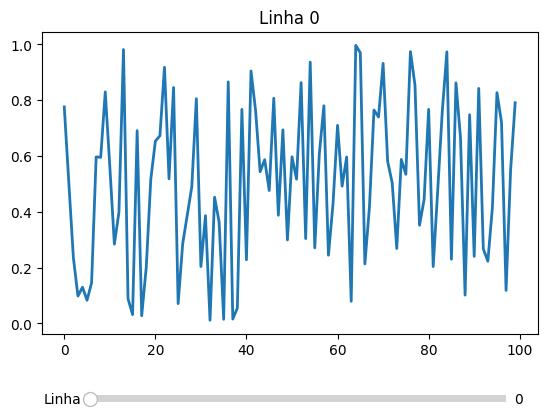

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

# Gerar uma matriz de exemplo (10 linhas x 100 colunas)
matrix = np.random.rand(10, 100)

# Inicialmente, plottar a primeira linha da matriz
initial_line = 0
x = np.arange(matrix.shape[1])
y = matrix[initial_line]

# Criar a figura e o eixo do gráfico
fig, ax = plt.subplots()
line, = ax.plot(x, y, lw=2)
ax.set_title(f"Linha {initial_line}")

# Ajustar a posição do gráfico para abrir espaço para o slider
plt.subplots_adjust(bottom=0.25)

# Adicionar um slider abaixo do gráfico
ax_slider = plt.axes([0.2, 0.1, 0.65, 0.03])
line_slider = Slider(ax_slider, 'Linha', 0, matrix.shape[0] - 1, valinit=initial_line, valstep=1)

# Função para atualizar a linha plottada
def update(val):
    line_index = int(line_slider.val)
    line.set_ydata(matrix[line_index])
    ax.set_title(f"Linha {line_index}")
    fig.canvas.draw_idle()

# Conectar a função de atualização ao slider
line_slider.on_changed(update)

# Mostrar o gráfico
plt.show()
